In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import random
import math

In [12]:
# 1.1 Complex Dot Product

v1 = np.array([3j, -2])
v2 = np.array([3j, -2])

# Real dot product
v1@v2 == sum(v1*v2)

# Complex dot product
np.vdot(v1, v2) == sum(v1*np.conjugate(v2))

True

In [18]:
# 1.2 Complex Polar Form

a = 1
b = 1

# Rectangular Form
rec_num = a + b*1j

# Polar Form
pol_num = np.abs(rec_num)*np.exp(1j*np.angle(rec_num))

rec_num == np.round(pol_num, 9)

True

In [41]:
# 1.3 Roots of Unity

n = 5

RoU = [np.exp(1j*2*np.pi*k/n) for k in range(n)]

np.all(np.round(np.power(RoU, 5), 9) == 1)

True

In [50]:
# 1.4 Summing Roots of Unity

n = 9
a = 7

RoU = [np.exp(1j*2*np.pi*k*a/n) for k in range(n)]

np.round(sum(RoU), 9) == 0

True

In [114]:
# Visualizing a*R_n (mod n)

def draw_group(n, a):
    
    # Cartesian coordinates for the points
    x = np.cos([2*np.pi*k/n for k in range(n)])
    y = np.sin([2*np.pi*k/n for k in range(n)])

    # R_n and a*R_n (mod n)
    R_original = np.array(list(range(n)))
    R_modified = np.mod(a*R_original, n)

    # List of origin and destination for the arrows
    arrow_list = [((x[R_original[i]], y[R_original[i]]), (x[R_modified[i]], y[R_modified[i]])) for i in range(n)]

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))

    for elem in arrow_list:

        ## Left figure
        
        # Tuple unpack the coordinates of the arrow list
        xyA, xyB = elem

        # Drawing arrows
        coordsA = "data"
        coordsB = "data"
        con = ConnectionPatch(xyA, xyB, coordsA, coordsB,
                              arrowstyle="-|>", shrinkA=10, shrinkB=5,
                              mutation_scale=15, fc="black")
             
        ax1.add_artist(con)
        
        # Set axis labels
        ax1.set_xlabel('Real', fontsize = 20, fontfamily = 'serif', fontstyle = 'italic')
        ax1.set_ylabel('Imaginary', fontsize = 20, fontfamily = 'serif', fontstyle = 'italic')

        # Set window size
        ax1.set_xlim([-1.2, 1.2])
        ax1.set_ylim([-1.2, 1.2])
    
        # Set graph title
        ax1.set_title(f'n = {n}, a = {a}', fontsize= 20, fontfamily = 'serif', fontstyle = 'italic')
        
        ## Right figure
        
        # Draw x, y axis
        ax2.spines['left'].set_position('zero')
        ax2.spines['right'].set_color('none')
        ax2.spines['bottom'].set_position('zero')
        ax2.spines['top'].set_color('none')

        # Set window size
        ax2.set_xlim([-1.2, 1.2])
        ax2.set_ylim([-1.2, 1.2])
        
        # Create list of coordinates for ax2
        
        ax2_x = [x[R_modified[i]] for i in range(n)]
        ax2_y = [y[R_modified[i]] for i in range(n)]
        
        # Draw the points
        ax2.scatter(ax2_x, ax2_y)

        # Add the end points for the line connection
        ax2_x = ax2_x + [x[R_modified[0]]]
        ax2_y = ax2_y + [y[R_modified[0]]]
        
        # Add the number of mapping to a point
        for i in range(n):
            ax1.annotate(f"{math.gcd(n, a)}", (ax2_x[i], ax2_y[i]), 
                         (ax2_x[i]+np.sign(ax2_x[i])*0.07, ax2_y[i]+np.sign(ax2_y[i])*0.07), fontsize = 16)
            ax2.annotate(f"{math.gcd(n, a)}", (ax2_x[i], ax2_y[i]), 
                         (ax2_x[i]+np.sign(ax2_x[i])*0.07, ax2_y[i]+np.sign(ax2_y[i])*0.07), fontsize = 16)

        # Set graph title
        ax2.set_title(f'n = {n}, a = {a}', fontsize = 20, fontfamily = 'serif', fontstyle = 'italic')
        
        # Plot both subplots
        ax1.plot([xyA[0], xyB[0]], [xyA[1], xyB[1]], "o")
        ax2.plot(ax2_x, ax2_y)

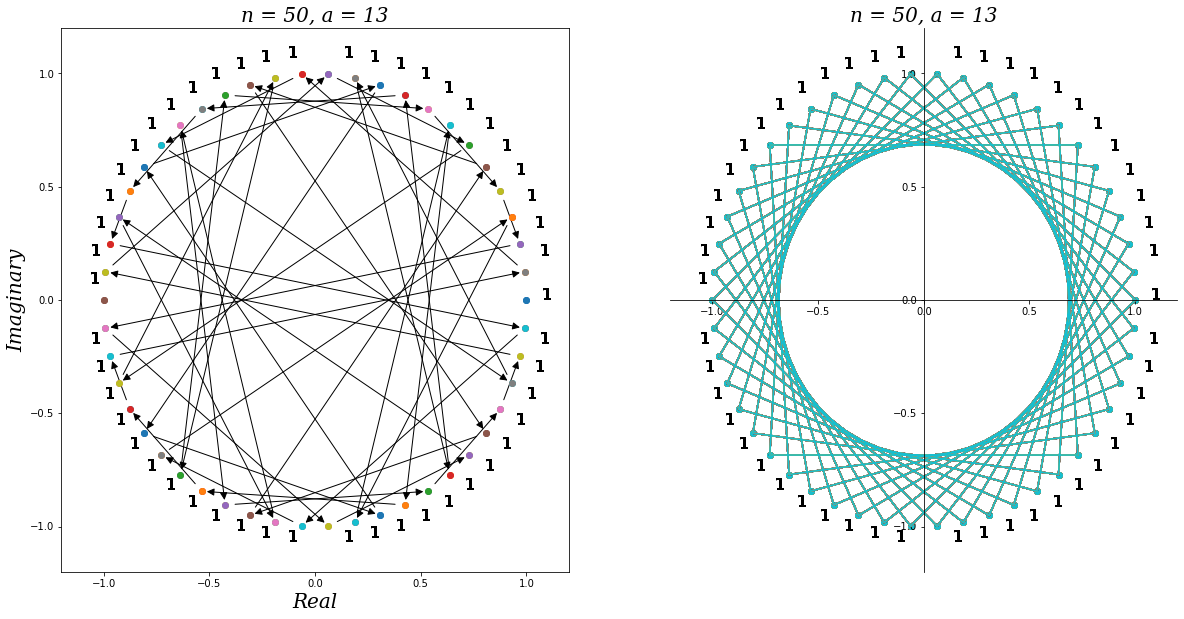

In [120]:
n = 50
a = 13

draw_group(n, a)

# The left figure represents the mapping from R_n to a*R_n (mod n)

# The right figure represents the product space of R_phi

In [125]:
# Conjecture Monte Carlo simulation

def CountFrequency(my_list): 
    count = {} 
    for i in my_list: 
        count[i] = count.get(i, 0) + 1
    return count 

correct = 0
shots = 10
for i in range(shots):

    n = random.randint(1, 100_000)
    a = random.randint(1, n)

    R_original = np.arange(n)
    R_modified = np.mod(a*R_original, n)

    if len(set(R_modified)) == n/math.gcd(n, a):

        if np.all(np.array(list(CountFrequency(R_modified).values())) == math.gcd(n, a)):
            correct+=1

        else:
            print(n, a)

    else:
        print(n,a)
        
correct == shots

True

In [128]:
# 1.5 Kronecker delta

kronecker_delta = lambda j, m: 1 if j == m else 0

kronecker_delta(5, 5) == 1

True